In [92]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from preprocess import preprocess
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline

In [93]:
df = pd.read_csv('../data/profiles_revised.csv')

cols = df.columns
cols

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [94]:
df = df.drop(columns=['ethnicity', 'religion', 'speaks', 'education', 'pets'])
cols = df.columns

In [95]:
df = preprocess(cols, df)
df = df.drop(columns=['diet_modifier', 'sign_modifier_extracted'])

In [96]:
df.head()

age  body_type  diet  drinks  drugs    height  income  job  \
1    0.386157          2     3       2      2  0.427283       6    8   
14  -0.351468         10     0       4      0 -1.596854       3   12   
72   0.175407          1     0       4      2  1.186334       8    0   
73  -0.246093          3     0       4      0 -1.849871       3    9   
123 -1.089092         10     0       4      1  0.427283      11   10   

     orientation  sex  smokes  status  offspring_status  offspring_future  \
1              2    1       0       3                 0                 1   
14             2    0       0       3                 0                 2   
72             2    1       0       3                 0                 1   
73             2    0       0       3                 0                 1   
123            2    1       1       3                 0                 0   

     sign_extracted  
1                 2  
14               10  
72                7  
73                6  
123               8

In [97]:
lables = cosine_similarity(df)[0]

In [98]:
SIMILARITY_THRESHOLD = 0.67
lables = [0 if x < SIMILARITY_THRESHOLD else 1 for x in lables]

In [99]:
df['lables'] = lables

In [100]:
df.shape

(1686, 16)

In [101]:
#BEGIN = 50
#df = df.drop(df.index[BEGIN:])

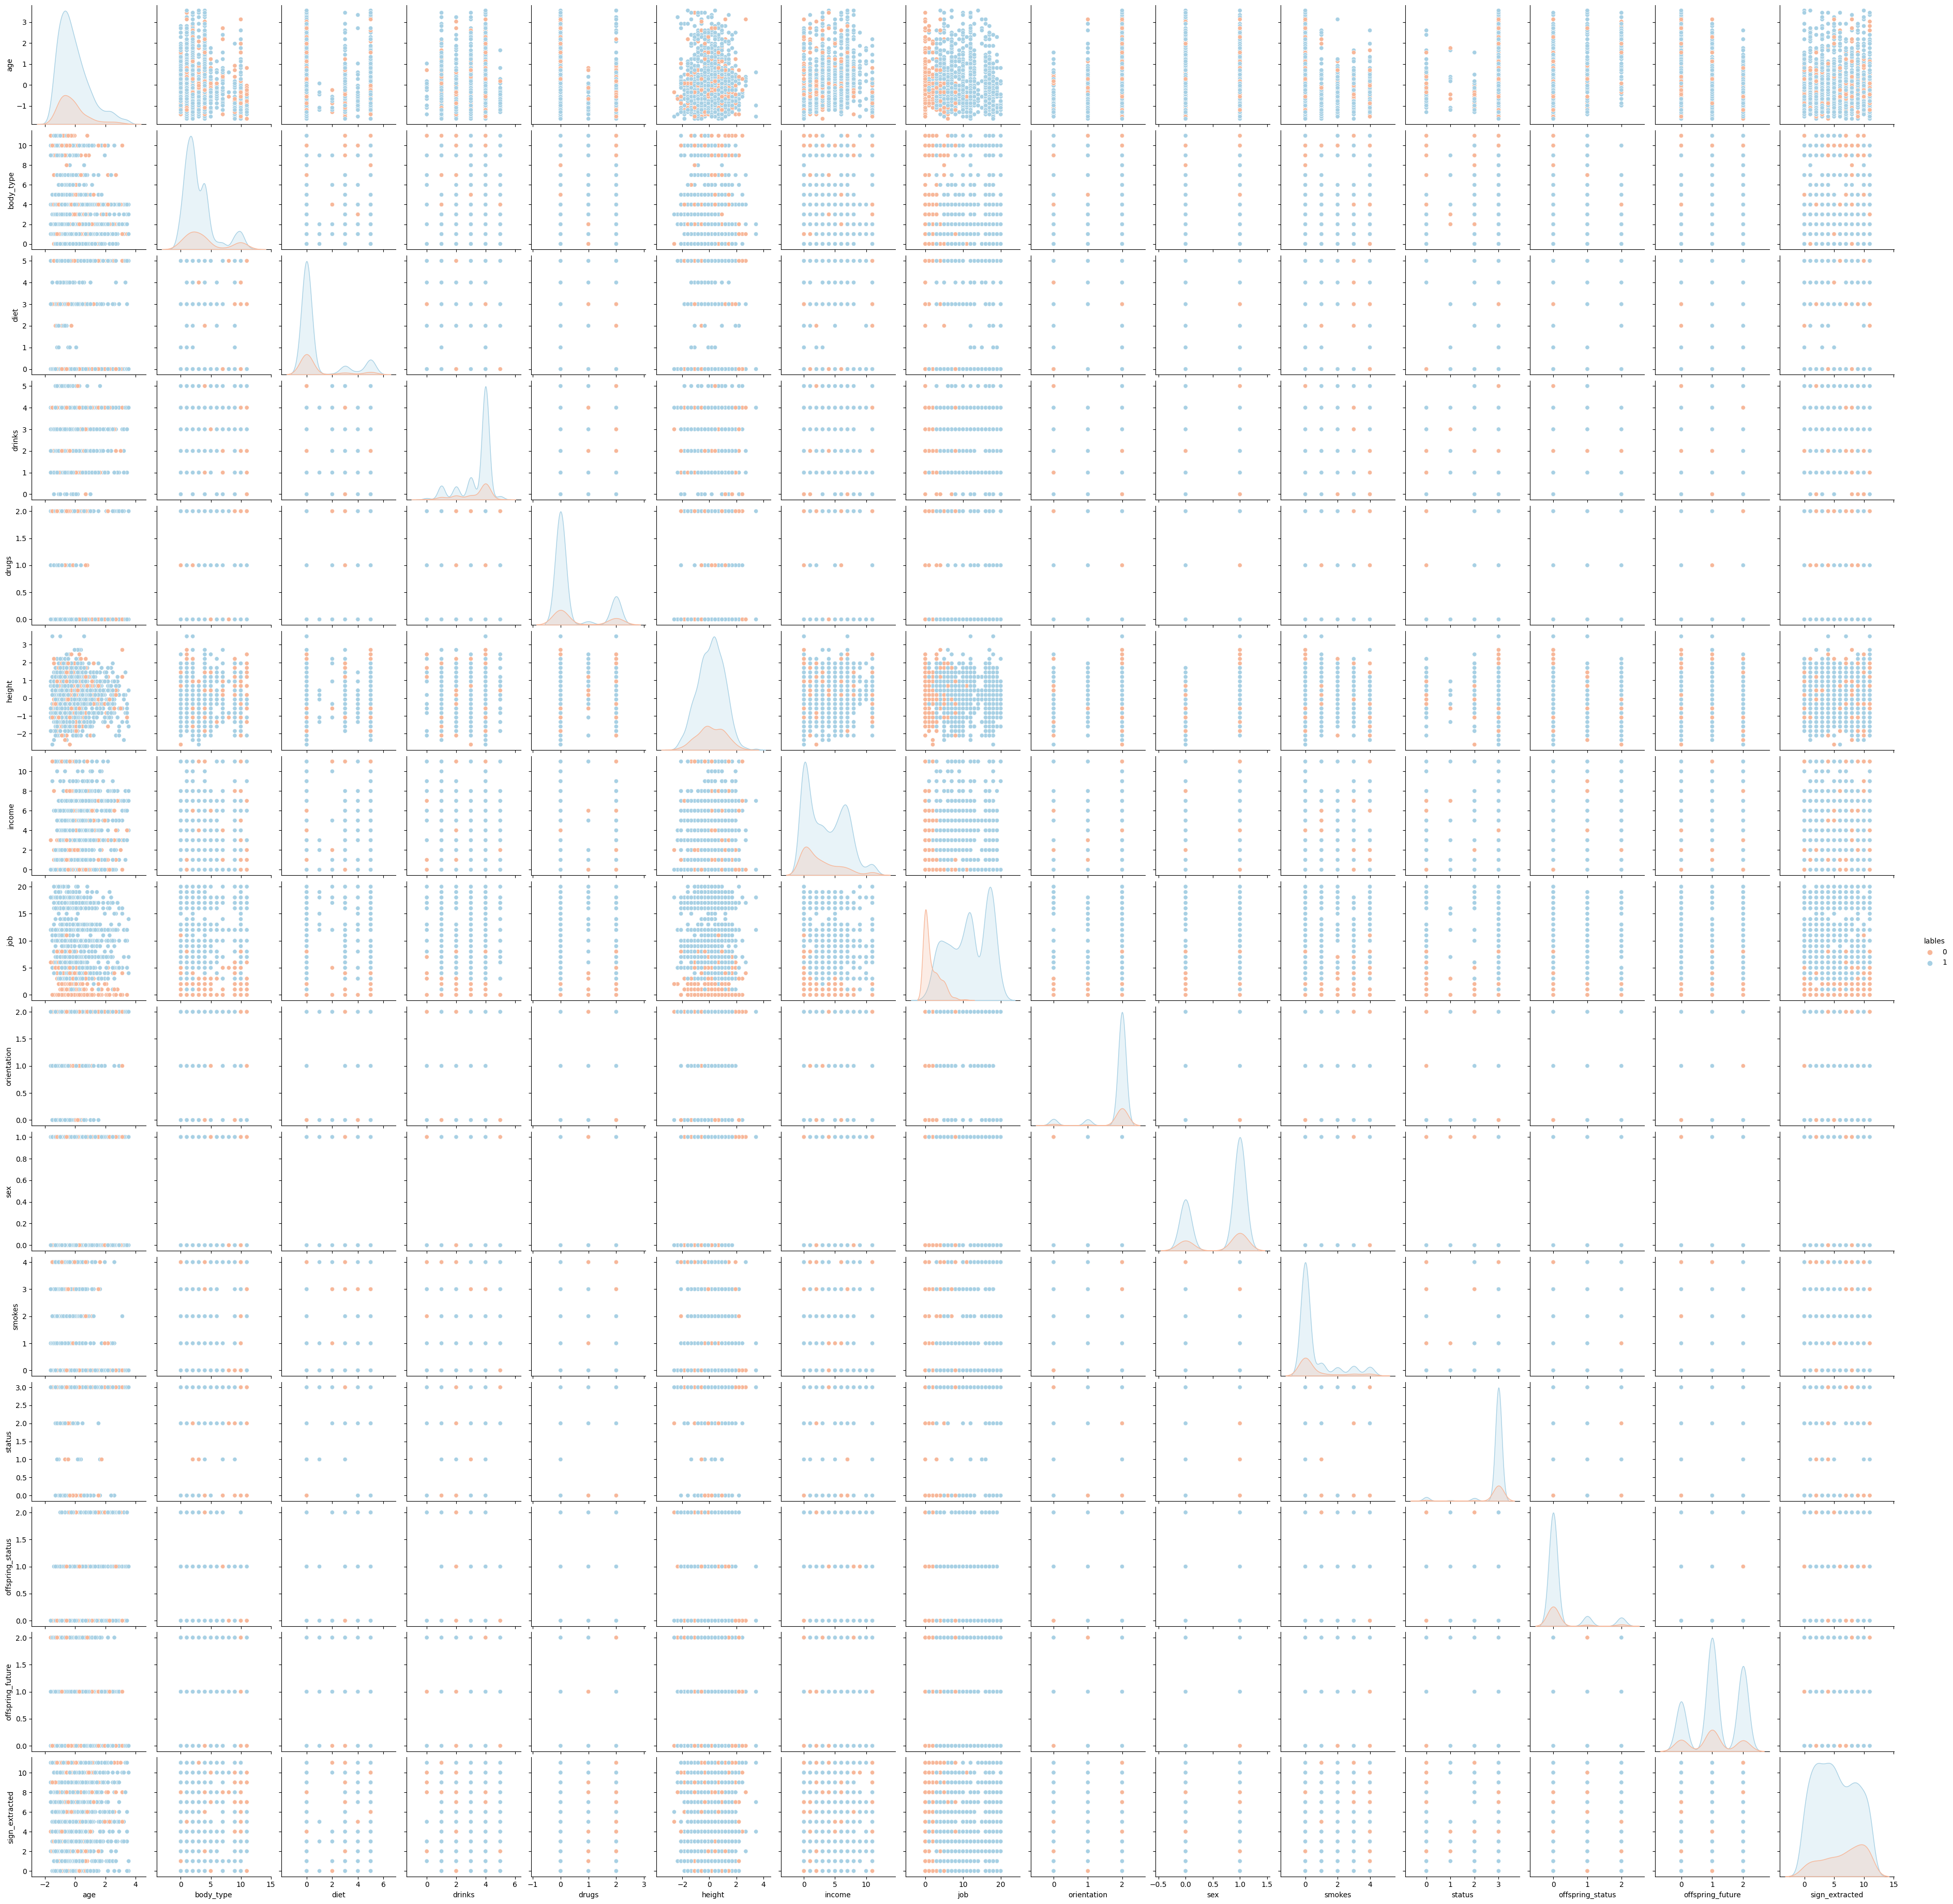

In [102]:
sns.pairplot(data=df, hue='lables', palette='RdBu')

In [103]:
y = df['lables']
df = df.drop(columns=['lables'])
X = df


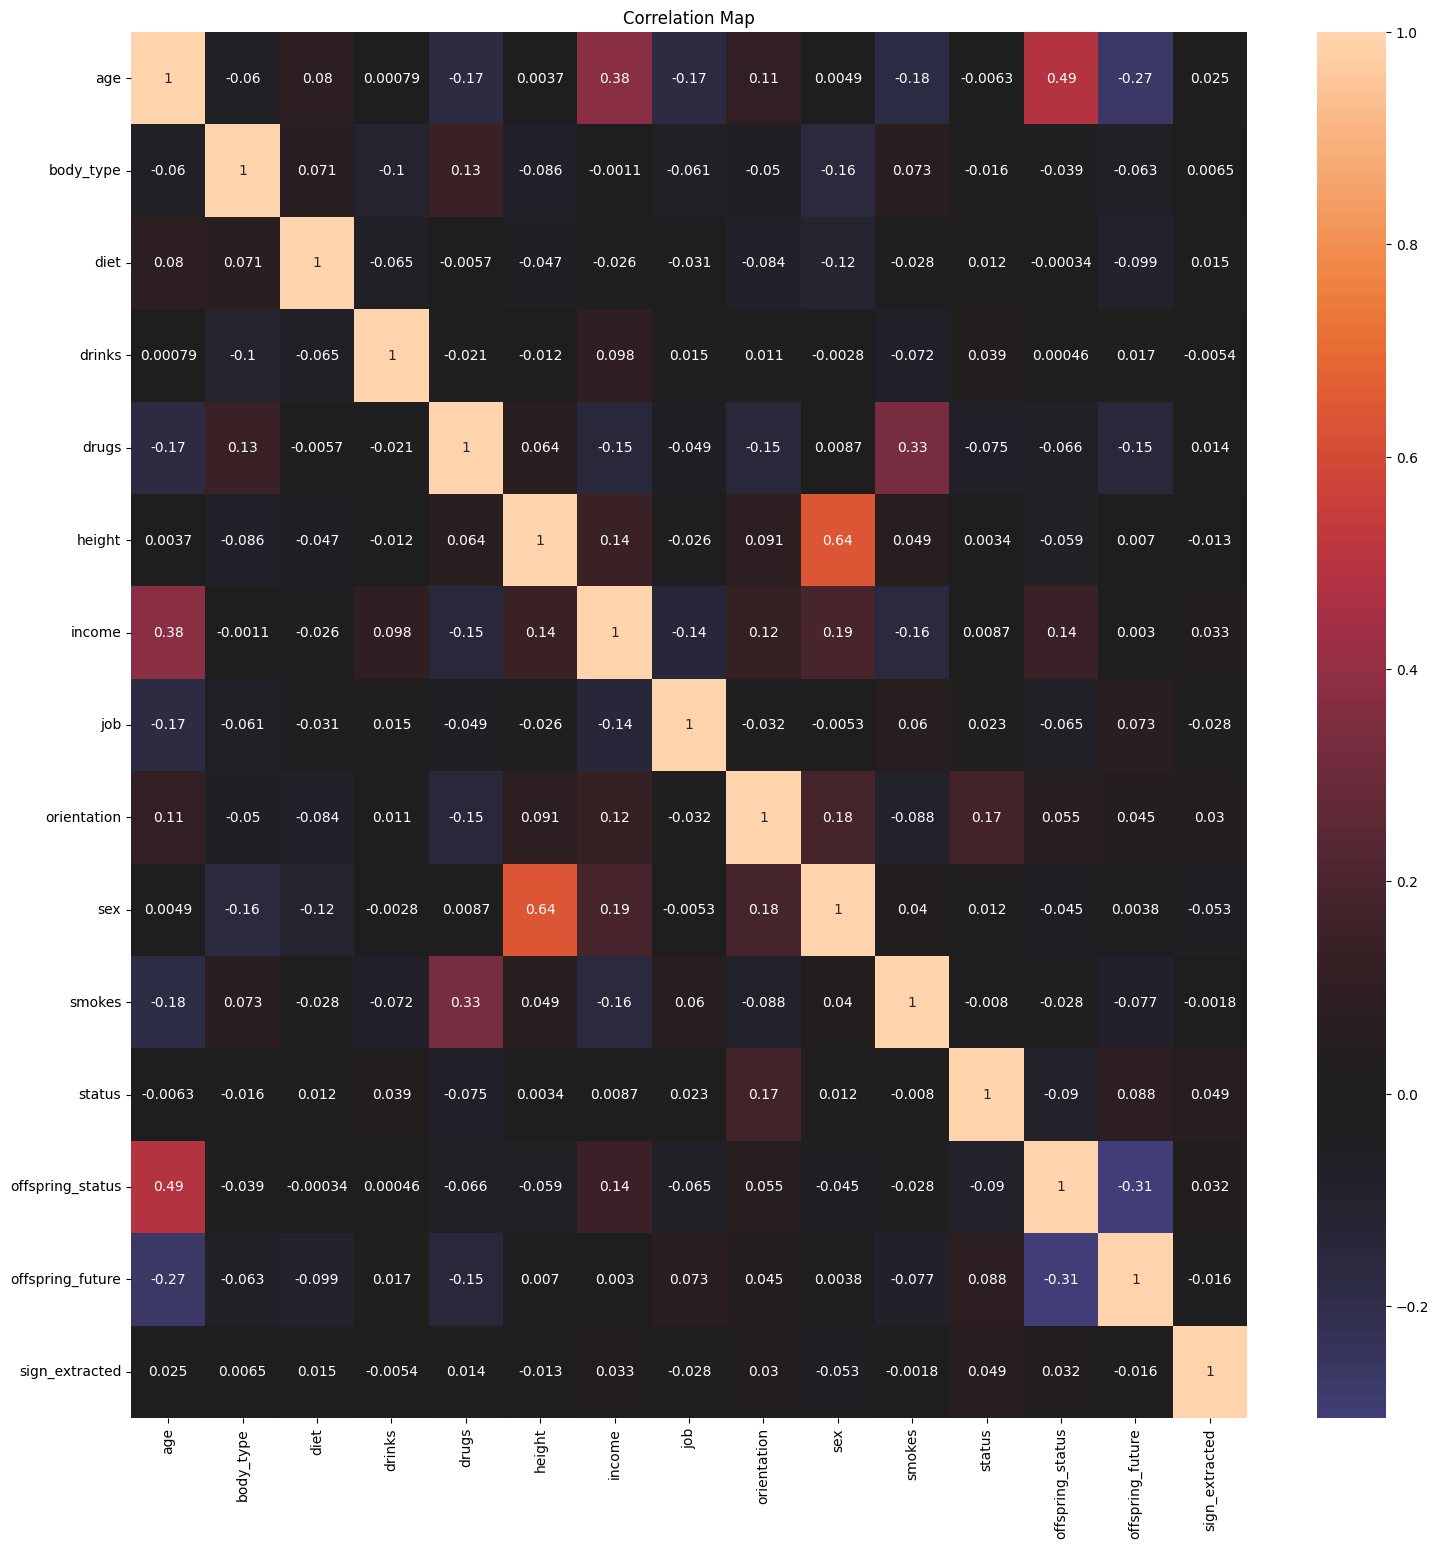

In [104]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), center=0, annot=True)
plt.title('Correlation Map')
plt.show()

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape, '\t is the shape of the Training Features')
print(y_train.shape, '\t is the shape of the Training Lables')
print(X_test.shape, '\t is the shape of the Test Features')
print(y_test.shape, '\t is the shape of the Test Lables')



(1180, 15) 	 is the shape of the Training Features
(1180,) 	 is the shape of the Training Lables
(506, 15) 	 is the shape of the Test Features
(506,) 	 is the shape of the Test Lables


In [106]:
model = KNeighborsClassifier(n_neighbors = 1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [107]:
from sklearn.model_selection import cross_val_score


neighbors = []
cv_scores = []

for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
    
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[0.9704142  0.95857988 0.95266272 0.95266272 0.9704142  0.94674556
 0.95833333 0.94047619 0.93452381 0.93452381]


Optimal number of k neighbors = 27


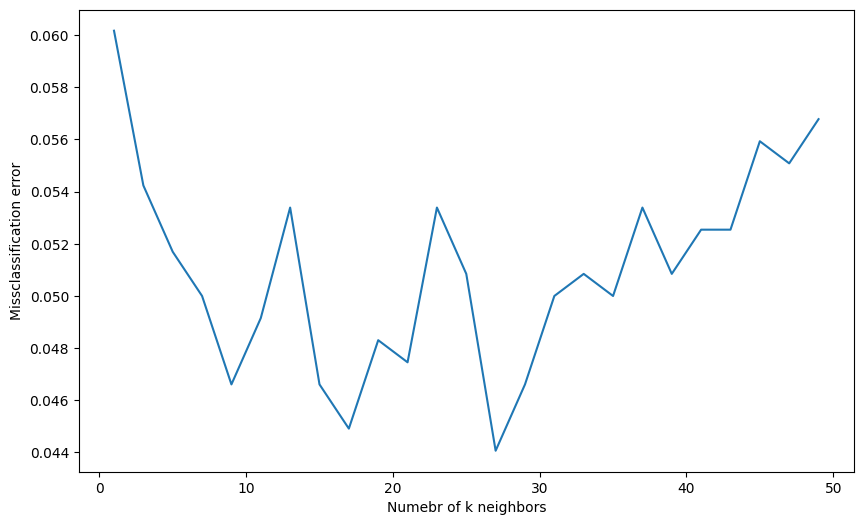

In [108]:
MSE = [1-x for x in cv_scores]
optimal_k = neighbors[MSE.index(min(MSE))]
print('Optimal number of k neighbors = {}'.format(optimal_k))

plt.figure(figsize=(10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Numebr of k neighbors')
plt.ylabel('Missclassification error')
plt.show()

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.88      0.93       102
           1       0.97      1.00      0.98       404

    accuracy                           0.97       506
   macro avg       0.97      0.94      0.96       506
weighted avg       0.97      0.97      0.97       506

Accuracy of similarity prediction using KNN = 97.23320158102767


Text(113.9222222222222, 0.5, 'Predicted class')

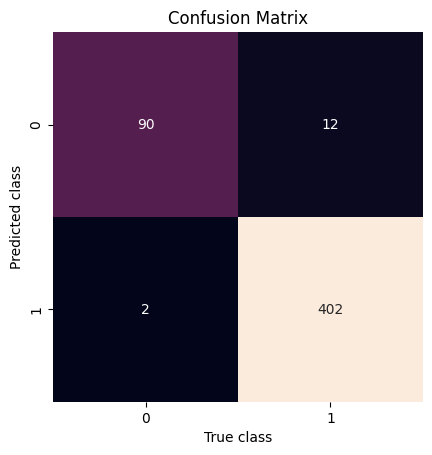

In [109]:
model = KNeighborsClassifier(n_neighbors=27)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import classification_report
print('Classification Report:')
print(classification_report(y_test, y_pred))

from sklearn.metrics import accuracy_score
print('Accuracy of similarity prediction using KNN = {}'.format(accuracy_score(y_pred, y_test)*100))


from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_pred, y_test)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)

plt.title('Confusion Matrix')
plt.xlabel('True class')
plt.ylabel('Predicted class')

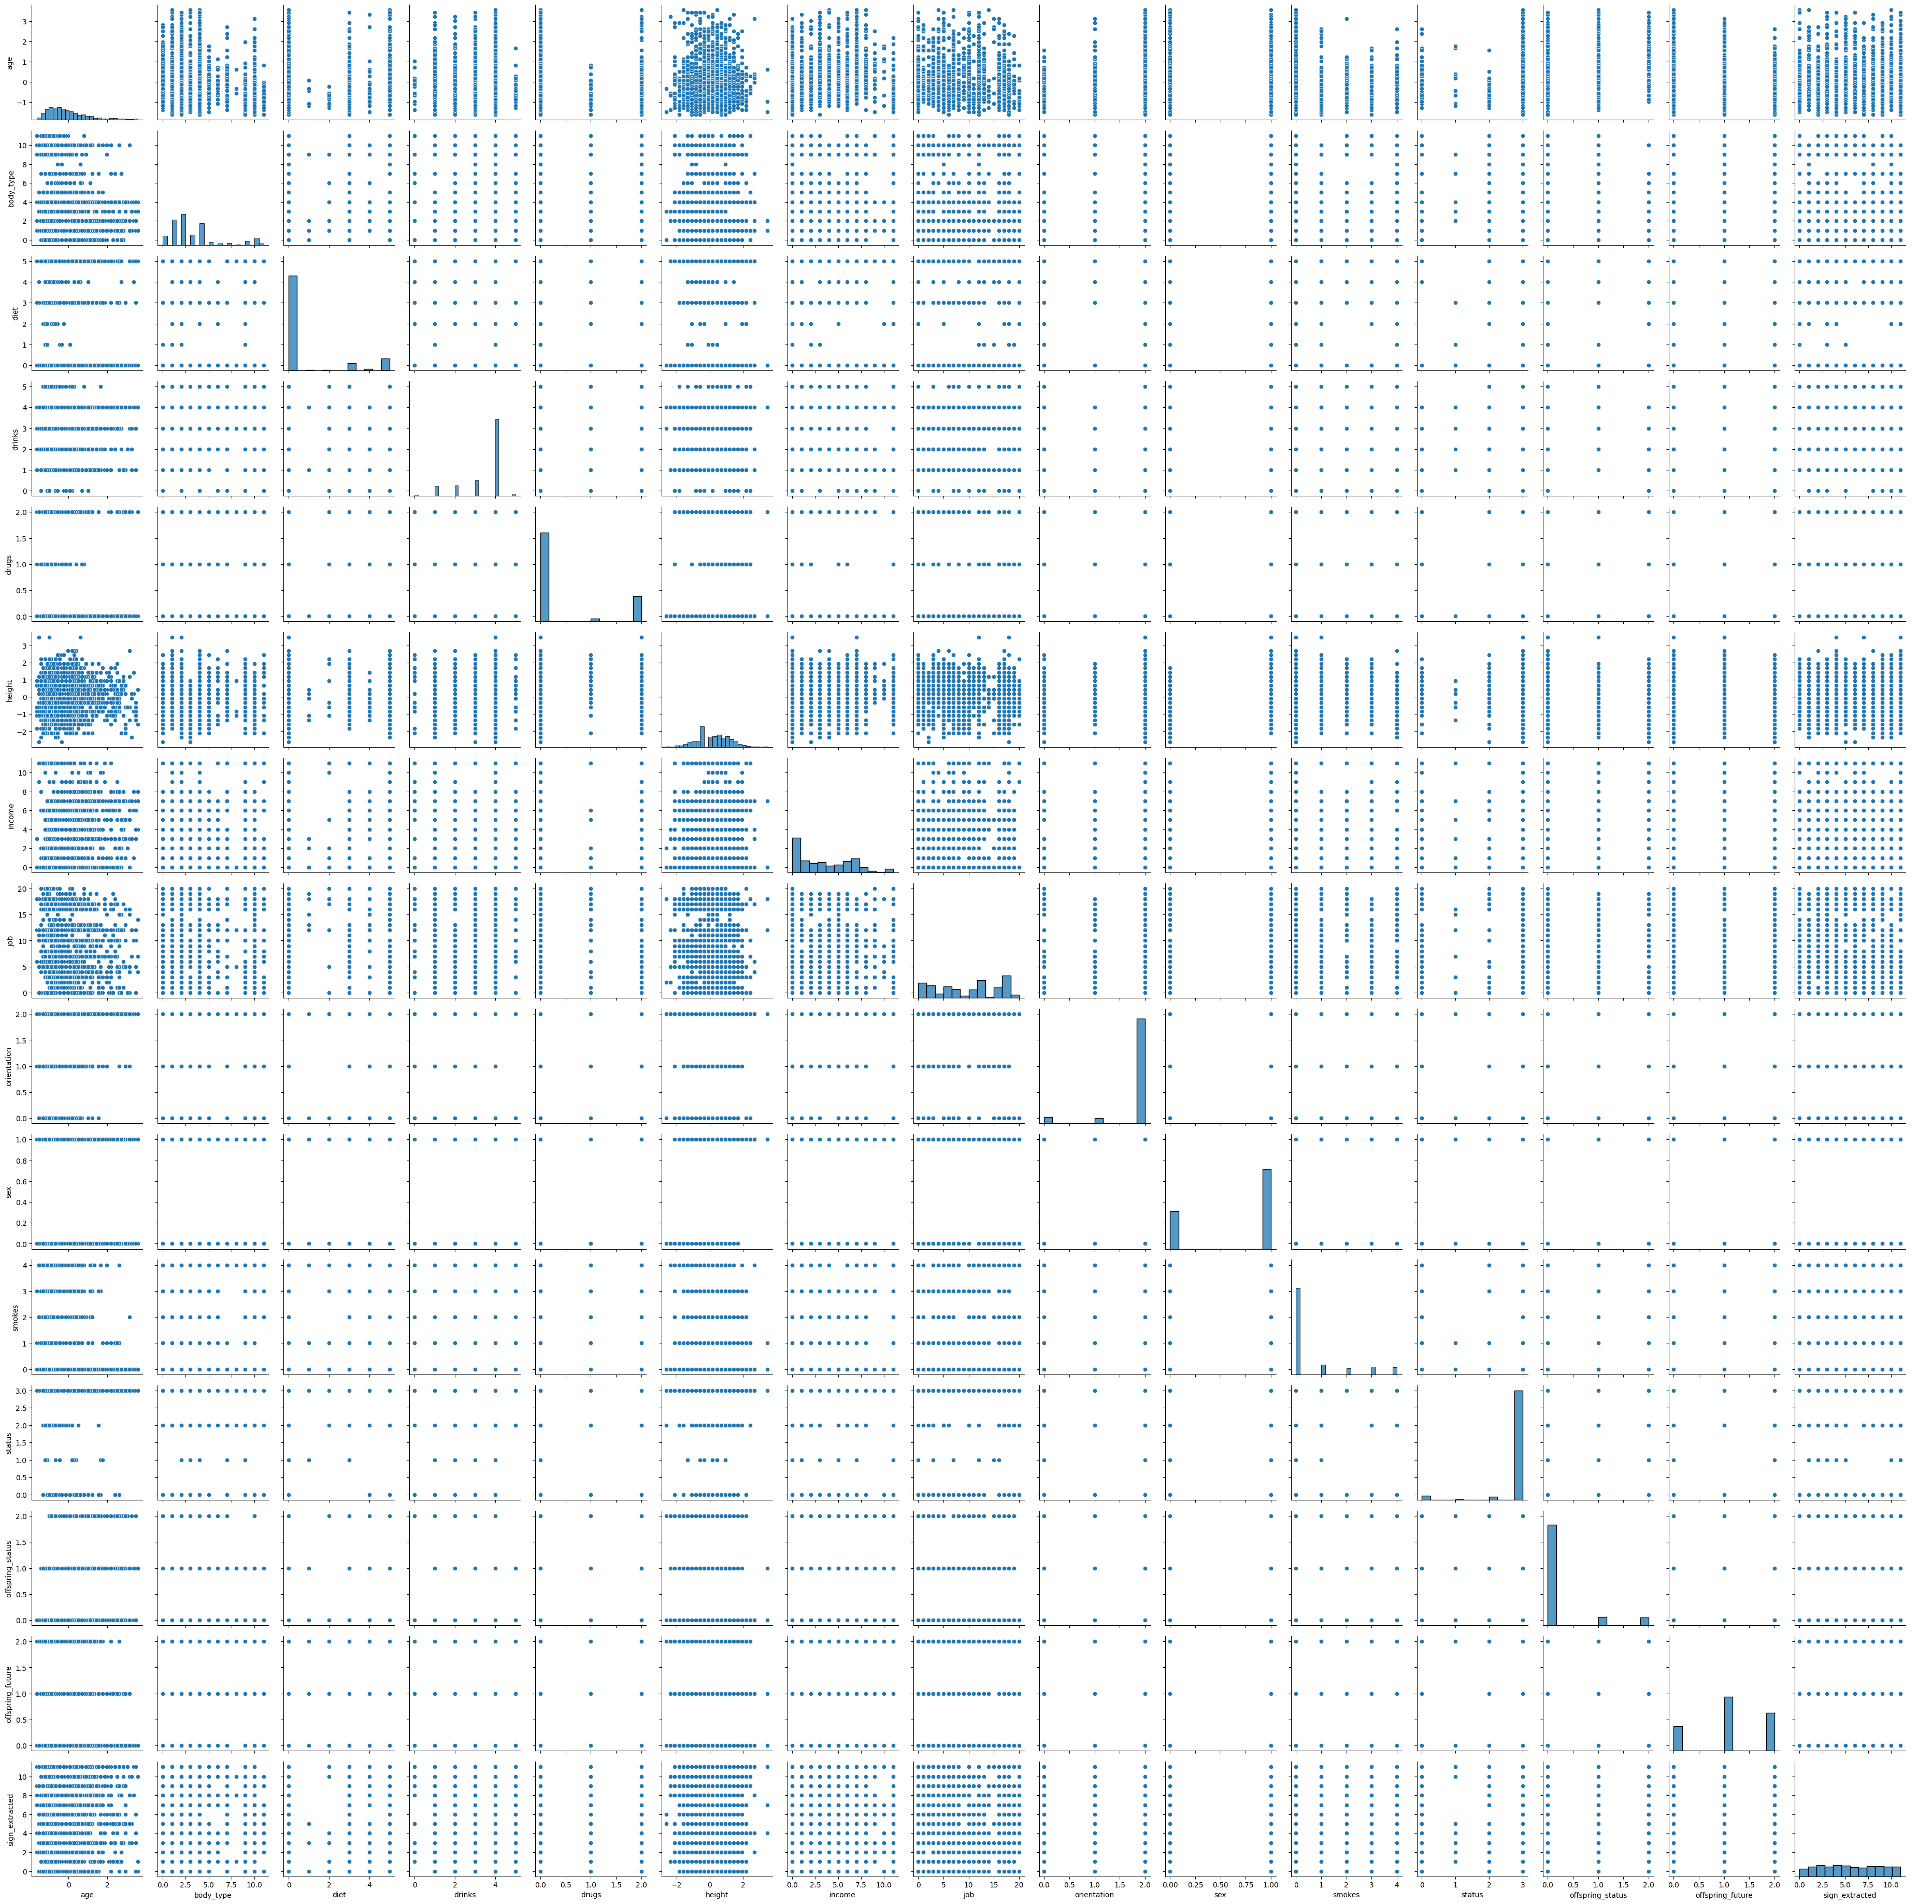

In [111]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

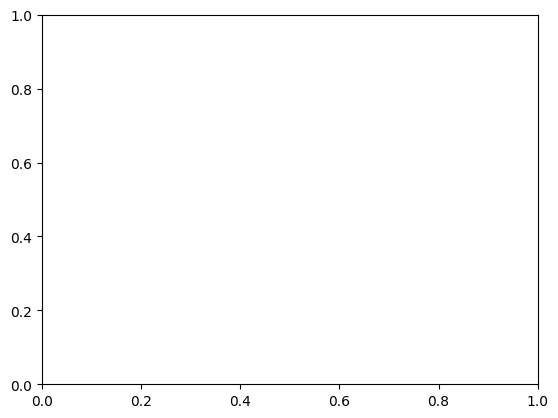

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.inspection import DecisionBoundaryDisplay

n_neighbors = 27

# import some data to play with

# we only take the first two features. We could avoid this ugly
# slicing by using a two-dim dataset



# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

for weights in ["uniform", "distance"]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    _, ax = plt.subplots()
    DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        cmap=cmap_light,
        ax=ax,
        response_method="predict",
        plot_method="pcolormesh",
        xlabel=X['age'],
        ylabel=X['age'],
        shading="auto",
    )

    # Plot also the training points
    sns.scatterplot(
        x=X[:, 0],
        y=X[:, 1],
        hue=y['lables'],
        palette=cmap_bold,
        alpha=1.0,
        edgecolor="black",
    )
    plt.title(
        "3-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights)
    )

plt.show()

In [32]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
from preprocess import preprocess, preprocess2
import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
%matplotlib inline




In [15]:
df = pd.read_csv('../data/profiles_revised.csv')

cols = df.columns
cols

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'ethnicity',
       'height', 'income', 'job', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [16]:
df = df.drop(columns=['ethnicity', 'religion', 'speaks', 'education', 'pets'])
cols = df.columns
df = preprocess(cols, df)
df = df.drop(columns=['diet_modifier', 'sign_modifier_extracted'])


In [6]:
df_cleaned = pd.read_csv('../data/profiles_revised.csv')
df_cleaned = df_cleaned.drop(columns=['ethnicity', 'religion', 'speaks', 'education', 'pets'])
cols = df_cleaned.columns
df_cleaned = preprocess2(cols, df_cleaned)
df_cleaned = df_cleaned.drop(columns=['diet_modifier', 'sign_modifier_extracted'])

In [7]:
df_cleaned.head()

age  body_type  diet  ...  offspring_status  offspring_future  sign_extracted
1     36          2     3  ...                 0                 1               2
14    29         10     0  ...                 0                 2              10
72    34          1     0  ...                 0                 1               7
73    30          3     0  ...                 0                 1               6
123   22         10     0  ...                 0                 0               8

[5 rows x 15 columns]

Text(0.5, 1.0, 'Visualization of 2 features')

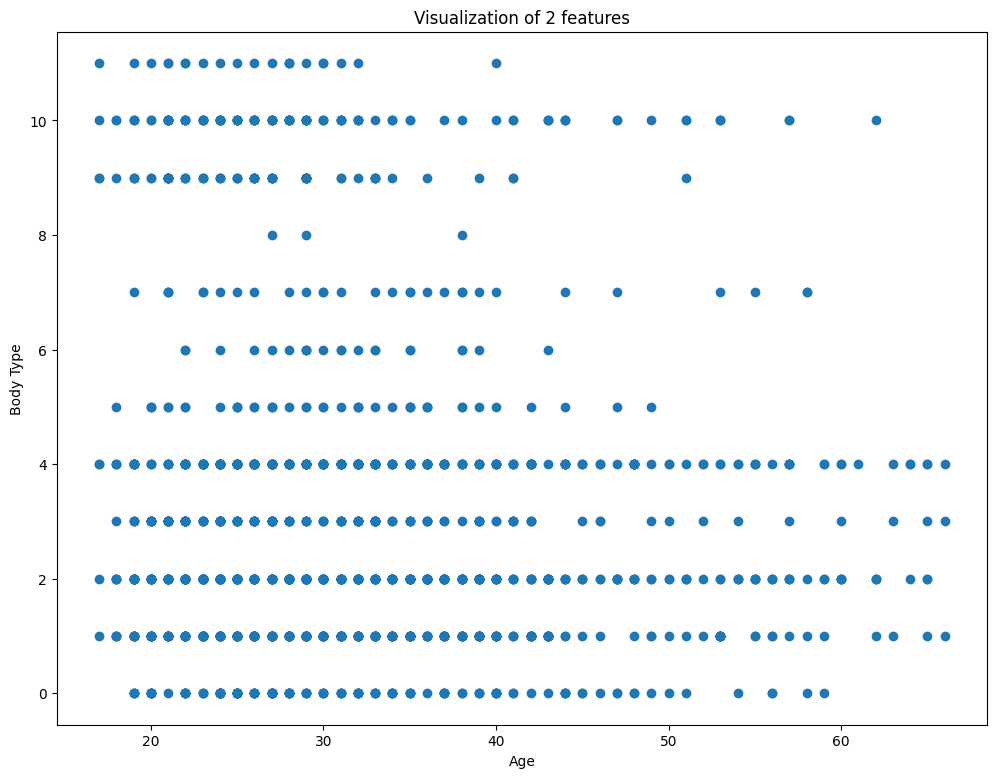

In [10]:
plt.figure(figsize=(12, 9))
plt.scatter(df_cleaned.iloc[:, 0], df_cleaned.iloc[:, 1])
plt.xlabel('Age')
plt.ylabel('Body Type')
plt.title('Visualization of 2 features')

In [ ]:
for n_index, column in enumerate(df_cleaned.columns):
    for m_index, column_iterator in enumerate(df_cleaned.columns):
        #print(n_index, column, m_index, column_iterator)
        plt.figure(figsize=(5, 5))
        plt.scatter(df_cleaned.iloc[:, n_index], df_cleaned.iloc[:, m_index])
        plt.xlabel(column)
        plt.ylabel(column_iterator)
        plt.title('Visualization of 2 features')

array([[<AxesSubplot:xlabel='age', ylabel='age'>,
        <AxesSubplot:xlabel='body_type', ylabel='age'>,
        <AxesSubplot:xlabel='diet', ylabel='age'>,
        <AxesSubplot:xlabel='drinks', ylabel='age'>,
        <AxesSubplot:xlabel='drugs', ylabel='age'>,
        <AxesSubplot:xlabel='height', ylabel='age'>,
        <AxesSubplot:xlabel='income', ylabel='age'>,
        <AxesSubplot:xlabel='job', ylabel='age'>,
        <AxesSubplot:xlabel='orientation', ylabel='age'>,
        <AxesSubplot:xlabel='sex', ylabel='age'>,
        <AxesSubplot:xlabel='smokes', ylabel='age'>,
        <AxesSubplot:xlabel='status', ylabel='age'>,
        <AxesSubplot:xlabel='offspring_status', ylabel='age'>,
        <AxesSubplot:xlabel='offspring_future', ylabel='age'>,
        <AxesSubplot:xlabel='sign_extracted', ylabel='age'>],
       [<AxesSubplot:xlabel='age', ylabel='body_type'>,
        <AxesSubplot:xlabel='body_type', ylabel='body_type'>,
        <AxesSubplot:xlabel='diet', ylabel='body_type'>,
     

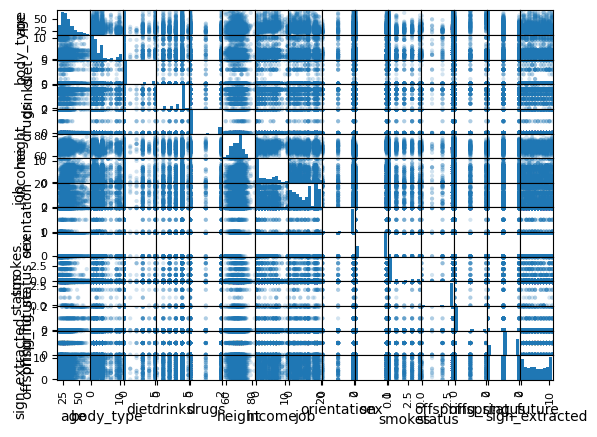

In [14]:
pd.plotting.scatter_matrix(df_cleaned, alpha=0.2)

In [17]:
pca = PCA()
pca.fit(df)

PCA()

In [22]:
var_ratio = pca.explained_variance_ratio_

Text(0, 0.5, 'Cumulative Explained Variance')

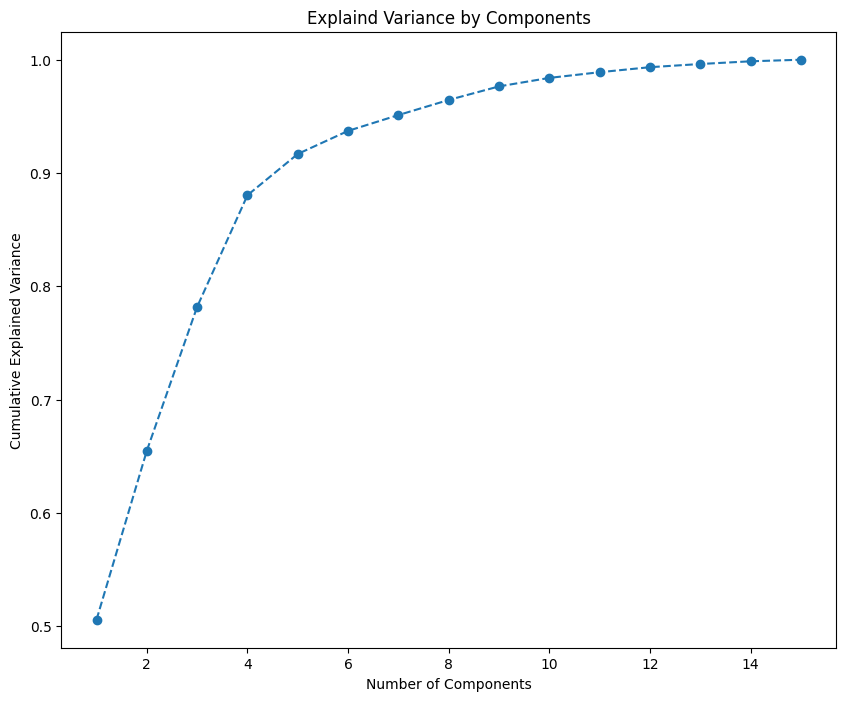

In [27]:
plt.figure(figsize=(10,8))
plt.plot(range(1, len(var_ratio)+1), var_ratio.cumsum(), marker='o', linestyle='--')
plt.title('Explaind Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [29]:
PCA_COMPONENTS = 4

In [31]:
pca = PCA(n_components=PCA_COMPONENTS)
pca.fit(df)
scores_pca = pca.transform(df)
print(scores_pca)

[[ -1.88236541  -3.10057851   3.01323045  -0.66136895]
 [  2.02898297   4.43351033  -1.56855163   6.66958756]
 [-10.07346484   1.82109538   3.61558525  -2.17517308]
 ...
 [  6.36058311   0.99827924   7.09901091   7.17829535]
 [  0.19990366   4.34159299  -1.14554497   0.67412526]
 [  2.76027931  -2.99055744  -2.62016292  -1.36027402]]


In [33]:
wcss = []
for i in range(1, 21):
    kmeans_pca = KMeans(n_clusters=i, init='k-means++', random_state=420)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

Text(0, 0.5, 'K-means witch PCA Clustering')

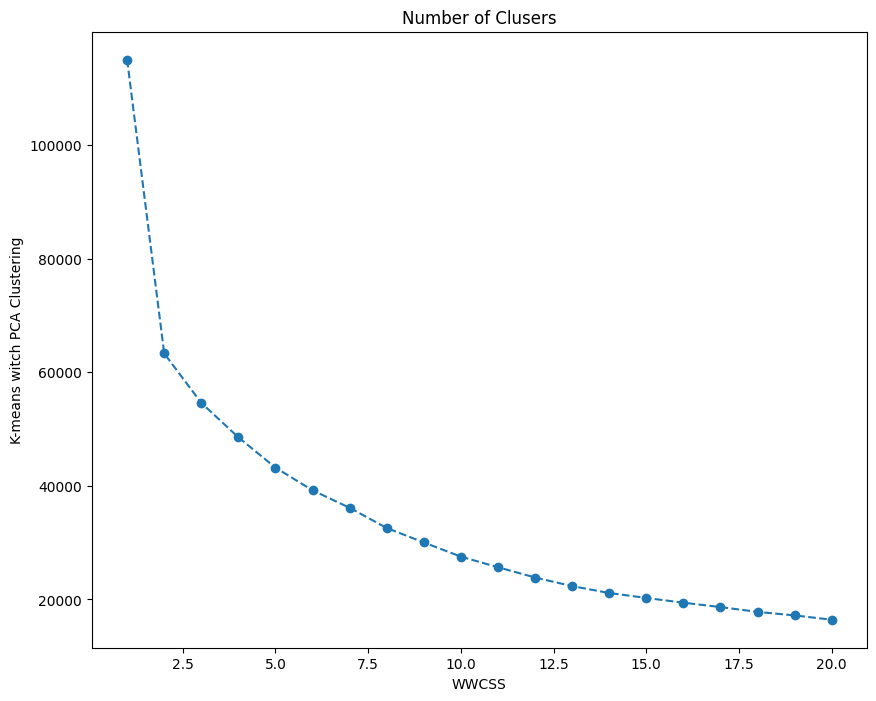

In [35]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 21), wcss, marker='o', linestyle='--')
plt.title('Number of Clusers')
plt.xlabel('WWCSS')
plt.ylabel('K-means witch PCA Clustering')

In [36]:
OPTIMAL_N_CLUSTER = 4

In [51]:
kmeans_pca = KMeans(n_clusters=OPTIMAL_N_CLUSTER, init='k-means++', random_state=420)
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=420)

In [52]:
df_segm_pca_kmeans = pd.concat([df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis=1)
df_segm_pca_kmeans.columns.values[-PCA_COMPONENTS:] = ['PComp 1', 'PComp 2', 'PComp 3', 'PComp 4']

df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [53]:
df_segm_pca_kmeans

age  body_type  diet  ...   PComp 3   PComp 4  Segment K-means PCA
0     0.386157          2     3  ...  3.013230 -0.661369                    3
1    -0.351468         10     0  ... -1.568552  6.669588                    2
2     0.175407          1     0  ...  3.615585 -2.175173                    0
3    -0.246093          3     0  ... -0.502994 -0.268552                    2
4    -1.089092         10     0  ...  6.179837  7.482630                    2
...        ...        ...   ...  ...       ...       ...                  ...
1681 -0.878342         10     0  ... -3.402789  6.757517                    3
1682 -0.878342          2     5  ... -2.875806 -1.000801                    2
1683  0.070032          9     0  ...  7.099011  7.178295                    2
1684 -0.035343          4     0  ... -1.145545  0.674125                    2
1685 -1.299841          2     0  ... -2.620163 -1.360274                    1

[1686 rows x 20 columns]

In [54]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first',
    1: 'second',
    2: 'third',
    4: 'fourth'
})

In [59]:
df_segm_pca_kmeans.head()

age  body_type  diet  ...   PComp 4  Segment K-means PCA  Segment
0  0.386157          2     3  ... -0.661369                    3      NaN
1 -0.351468         10     0  ...  6.669588                    2    third
2  0.175407          1     0  ... -2.175173                    0    first
3 -0.246093          3     0  ... -0.268552                    2    third
4 -1.089092         10     0  ...  7.482630                    2    third

[5 rows x 21 columns]

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1253656951.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


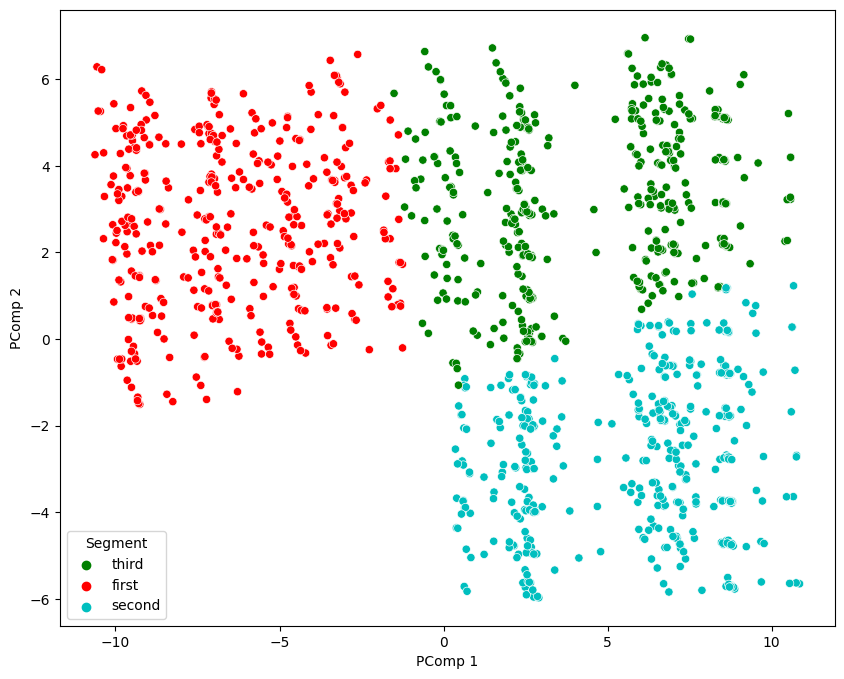

In [57]:
x_axis = df_segm_pca_kmeans['PComp 1']
y_axis = df_segm_pca_kmeans['PComp 2']
plt.figure(figsize=(10,8))
sns.scatterplot(x=x_axis, y=y_axis, hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
plt.show()

In [65]:
df_cluster = df_segm_pca_kmeans.iloc[:,-6:] # 4 components + hue + cat
df_cluster.head

Index(['PComp 1', 'PComp 2', 'PComp 3', 'PComp 4'], dtype='object')

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


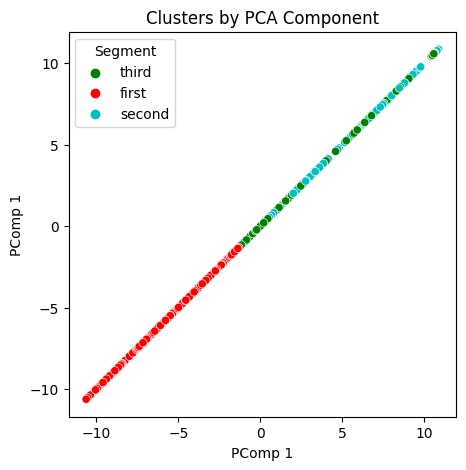

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


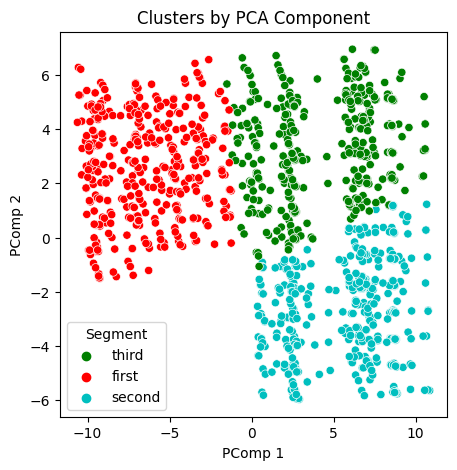

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


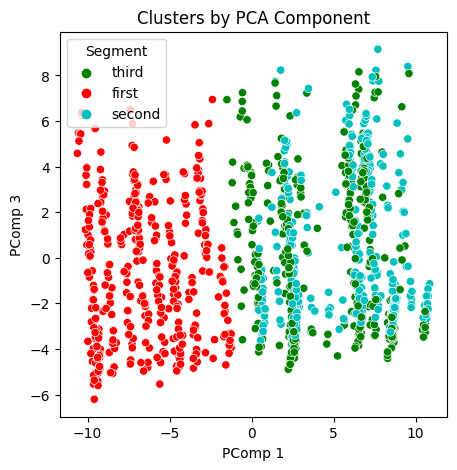

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


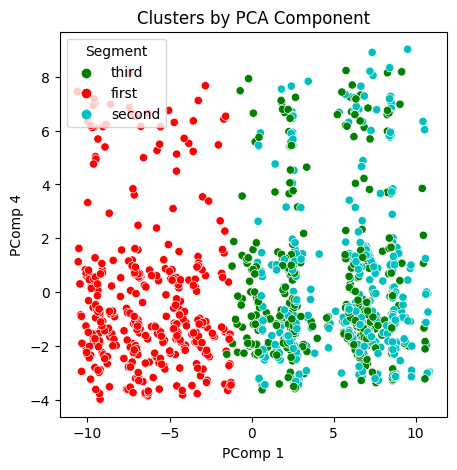

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


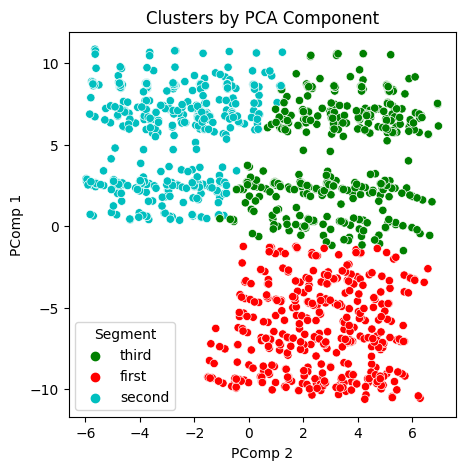

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


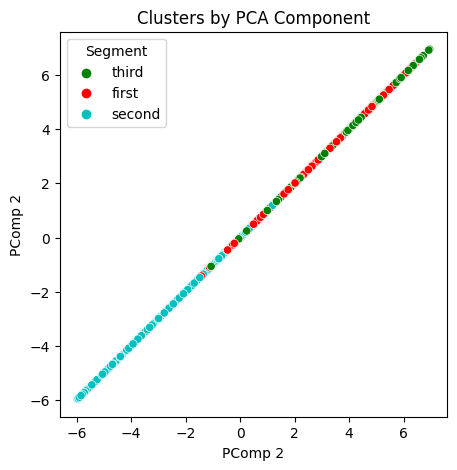

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


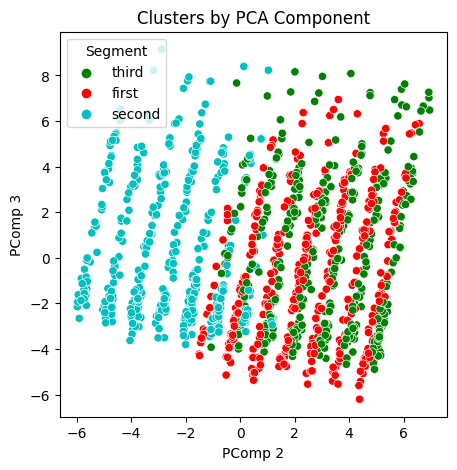

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


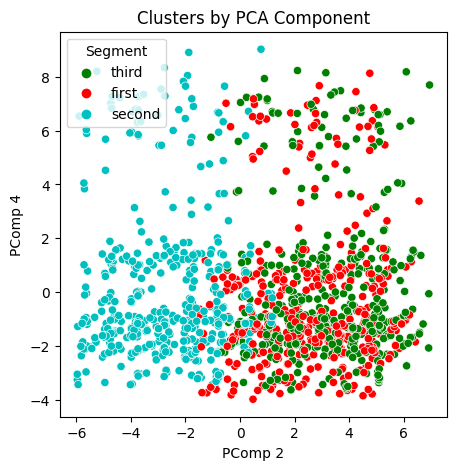

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


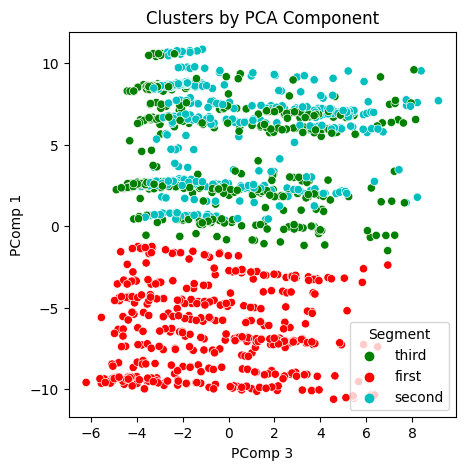

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


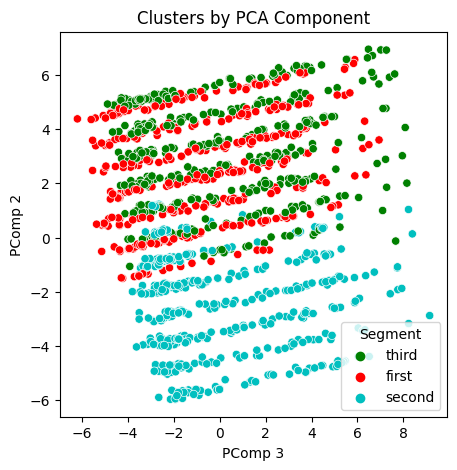

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


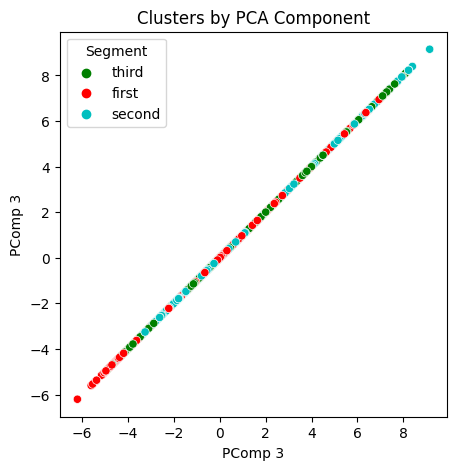

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


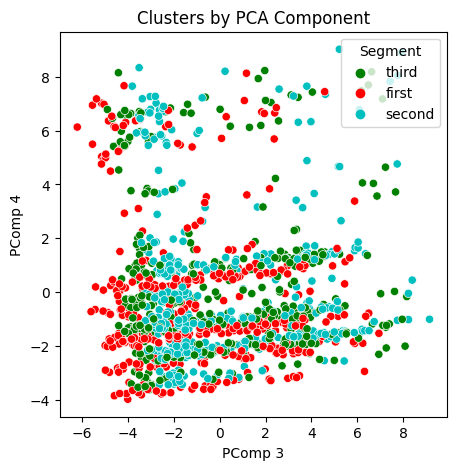

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


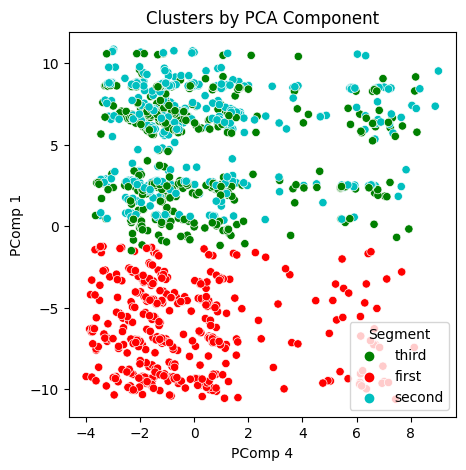

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


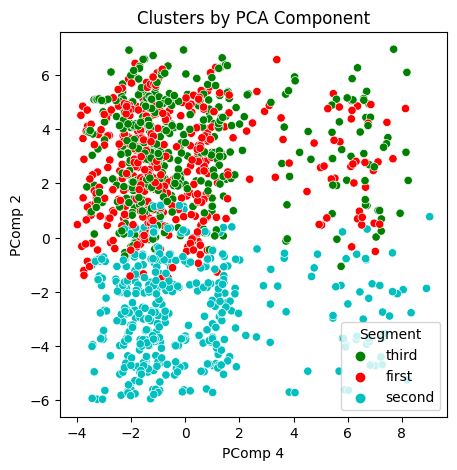

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


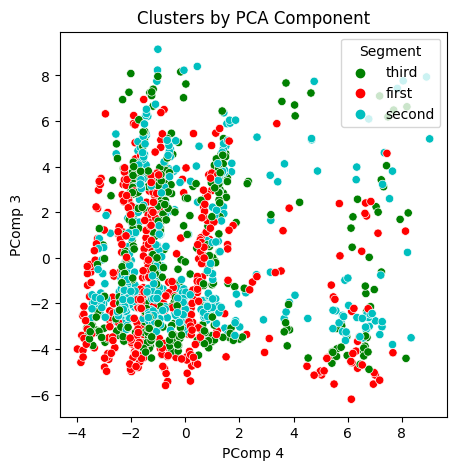

C:\Users\Nicolas\AppData\Local\Temp\ipykernel_14924\1655362050.py:5: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])


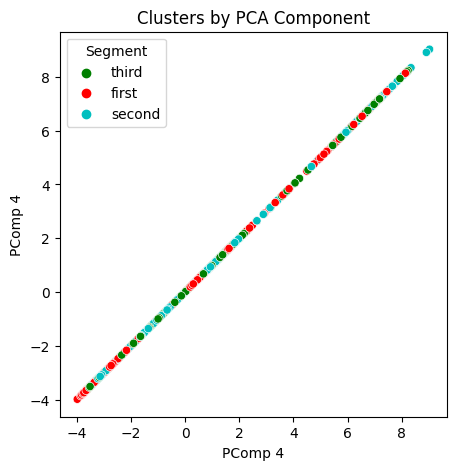

In [74]:
for n_index, column in enumerate(df_cluster.columns[:4]):
    for m_index, column_iterator in enumerate(df_cluster.columns[:4]):
        #print(n_index, column, m_index, column_iterator)
        fig = plt.figure(figsize=(5, 5))
        sns.scatterplot(x=df_cluster[column], y=df_cluster[column_iterator], hue = df_segm_pca_kmeans['Segment'], palette=['g', 'r', 'c', 'm'])
        plt.xlabel(column)
        plt.ylabel(column_iterator)
        plt.title('Clusters by PCA Component')
        fig.savefig('PCA {} vs {}.png'.format(column, column_iterator)) 
        plt.show()
        